In [1]:
%matplotlib notebook
from matplotlib import animation
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# кусочно-заданная функция внешнего воздействия
def f(x, y, t):    
    if t == 0.2:
        return np.exp(-np.sqrt(x**2+y**2)/4)*np.sin(3*np.sqrt(x**2+y**2))
    else:
        return 0
# начальные условия:   
I = (lambda x, y: 0) # u(x,y,0)
V = (lambda x, y: 0) # du\dt(x,y,0)

In [4]:
# длина и ширина сетки (области, в кот. ищем решение)
Lx = 10
Ly = 10
# шаг по времени
dt = 0.1
# макс. значение времени
T = 10
# точность сетки (колиечство шагов по пространнственным координатам)
Nx = 60
Ny = 60
# скорость распространения волны
c = 1.5

In [5]:
# задаем сетку
x = np.linspace(-Lx, Lx, Nx+1)                  
y = np.linspace(-Lx, Ly, Ny+1)      
# вычисляем размер шага по пространнственным координатам
dx = x[1] - x[0]
dy = y[1] - y[0]
# вычисляем количество шагов по времени
Nt = int(round(T/float(dt)))
# задаем временное пространство
t = np.linspace(0, Nt*dt, Nt+1)  
# вспомогательные переменные
Cx2 = (c*dt/dx)**2
Cy2 = (c*dt/dy)**2    
dt2 = dt**2

In [6]:
u   = np.zeros((Nx+1,Ny+1), dtype=np.float64)   
u_1 = np.zeros((Nx+1,Ny+1), dtype=np.float64)  
u_2 = np.zeros((Nx+1,Ny+1), dtype=np.float64)

In [7]:
Ix = range(0, u.shape[0])
Iy = range(0, u.shape[1])
It = range(0, t.shape[0])

# находим u(t=t[0]) из начального условия
for i in Ix:
    for j in Iy:
        u_1[i,j] = I(x[i], y[j])

In [8]:
# отдельный поиск u(t=t[1])
for i in Ix[1:-1]:
    for j in Iy[1:-1]:
        u_xx = u_1[i-1,j] - 2*u_1[i,j] + u_1[i+1,j]
        u_yy = u_1[i,j-1] - 2*u_1[i,j] + u_1[i,j+1]
        u[i,j] = u_1[i,j] + 0.5*Cx2*u_xx + 0.5*Cy2*u_yy + 0.5*dt2*f(x[i], y[j], t[1])
        u[i,j] += dt*V(x[i], y[j])
# выполняем граничные условия
j = Iy[0]
for i in Ix: u[i,j] = 0
j = Iy[-1]
for i in Ix: u[i,j] = 0
i = Ix[0]
for j in Iy: u[i,j] = 0
i = Ix[-1]
for j in Iy: u[i,j] = 0

In [9]:
# функция для остальных u(t=t[n], n > 1)
def func(u, u_1, u_2, t_1):
    Ix = range(0, u.shape[0]);  Iy = range(0, u.shape[1])
    for i in Ix[1:-1]:
        for j in Iy[1:-1]:
            u_xx = u_1[i-1,j] - 2*u_1[i,j] + u_1[i+1,j]
            u_yy = u_1[i,j-1] - 2*u_1[i,j] + u_1[i,j+1]
            u[i,j] = 2*u_1[i,j] - u_2[i,j] + Cx2*u_xx + Cy2*u_yy + dt2*f(x[i], y[j], t_1)
    # выполняем граничные условия
    j = Iy[0]
    for i in Ix: u[i,j] = 0
    j = Iy[-1]
    for i in Ix: u[i,j] = 0
    i = Ix[0]
    for j in Iy: u[i,j] = 0
    i = Ix[-1]
    for j in Iy: u[i,j] = 0
    return u

<IPython.core.display.Javascript object>


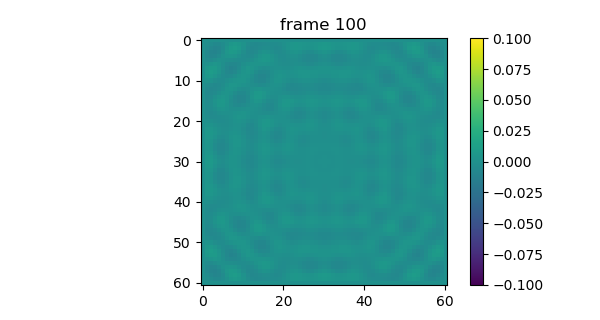

In [10]:
fig, ax = plt.subplots(figsize=(6,3.2))
im = ax.imshow(u_1)
plt.colorbar(im, ax=ax)
def animate(i):
    im.set_data(u)
    ax.set_title("frame {}".format(i))
    u_2[:,:], u_1[:,:] = u_1, u
    u[:,:] = func(u,u_1,u_2,t[i])
ani = animation.FuncAnimation(fig, animate, frames=t.size, repeat=False)
plt.show()